## Simple Analysis

In [7]:
!pip install mlxtend

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import mlxtend

In [53]:
df = pd.read_csv('data/R5_都立高校_普通科_エントロピー計算.csv')
df.head()

df_val = df.iloc[:, 2:]
df_val.head()

,偏差値,募集人員男,募集人員女,募集人員計,最終応募人員男,最終応募人員女,最終応募人員計,最終応募倍率男,最終応募倍率女,最終応募倍率計,...,"P(i1,m1)",P(i2|m1),"P(i2,m1)",P(i1|m2),"P(i1,m2)",P(i2|m2),"P(i2,m2)",H(I|M),H(M),H(I)
0,71,133,121,254,344,237,581,2.59,1.96,2.29,...,0.002990,0.592083,0.004339,0.476586,0.473093,0.523414,0.519578,0.998249,0.062512,1.060761
1,63,124,113,237,177,228,405,1.43,2.02,1.71,...,0.002876,0.437037,0.002233,0.476586,0.474151,0.523414,0.520740,0.998367,0.046243,1.044610
2,70,132,121,253,260,230,490,1.97,1.90,1.94,...,0.002901,0.530612,0.003280,0.476586,0.473640,0.523414,0.520179,0.998411,0.054245,1.052656
3,66,93,85,178,151,187,338,1.62,2.20,1.90,...,0.002359,0.446746,0.001905,0.476586,0.474554,0.523414,0.521183,0.998389,0.039708,1.038098
4,53,132,121,253,186,190,376,1.41,1.57,1.49,...,0.002397,0.494681,0.002346,0.476586,0.474325,0.523414,0.520932,0.998425,0.043442,1.041866


In [15]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
scatterplotmatrix(df_val.values, figsize=(100,100), names=df_val.columns, alpha=0.5)
plt.tight_layout()
# plt.show()
plt.savefig("output.png")

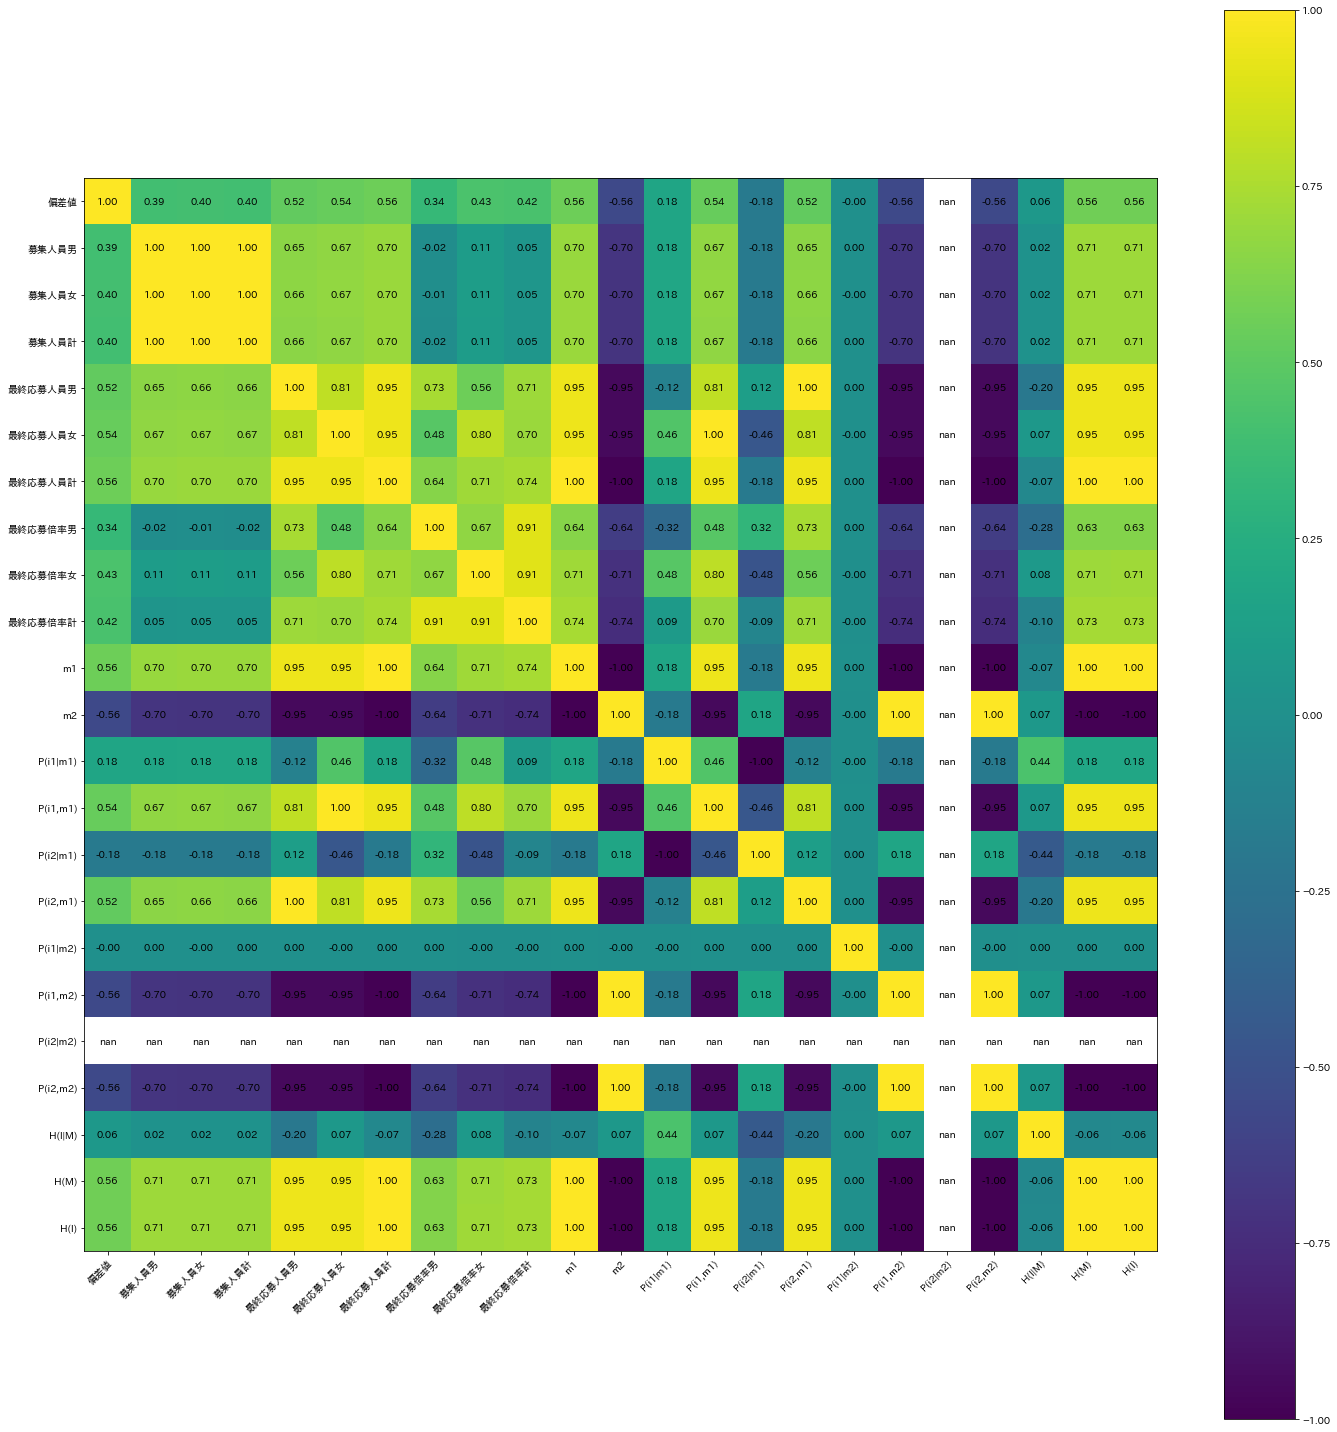

In [19]:
from mlxtend.plotting import heatmap
cm = np.corrcoef(df_val.values.T) # ピアソンの積率相関関数を計算
hm = heatmap(cm, row_names=df_val.columns, column_names=df_val.columns, figsize=(20,20))
plt.tight_layout()
plt.show()

## 偏差値とエントロピーの比較

In [58]:
df = pd.read_csv("data/R5_都立高校_普通科_エントロピー_偏差値_1025.csv")
df = df.iloc[:, :4]

df

,学校名,偏差値,H(I|M),H(I|G)
0,日比谷,71,0.998249,0.998417
1,三田,63,0.998367,0.998418
2,戸山,70,0.998411,0.998418
3,竹早,66,0.998389,0.998418
4,向丘,53,0.998425,0.998418
...,...,...,...,...
78,清瀬,56,0.998421,0.998418
79,久留米西,45,0.998379,0.998418
80,永山,42,0.998416,0.998412
81,田無,47,0.998391,0.998418


In [61]:
H_I = 0.998417541

xx = np.arange(0.9982, 0.9985, 0.000001)
yy = np.zeros(301) + H_I
zz = np.zeros(301) + 1
len(xx)

301

0     0.998249
1     0.998367
2     0.998411
3     0.998389
4     0.998425
        ...   
78    0.998421
79    0.998379
80    0.998416
81    0.998391
82    0.998315
Name: H(I|M), Length: 83, dtype: float64 0     0.998417
1     0.998418
2     0.998418
3     0.998418
4     0.998418
        ...   
78    0.998418
79    0.998418
80    0.998412
81    0.998418
82    0.998417
Name: H(I|G), Length: 83, dtype: float64 0     89
1     33
2     88
3     92
4     43
      ..
78    38
79    51
80    52
81    49
82    45
Name: 偏差値, Length: 83, dtype: int64


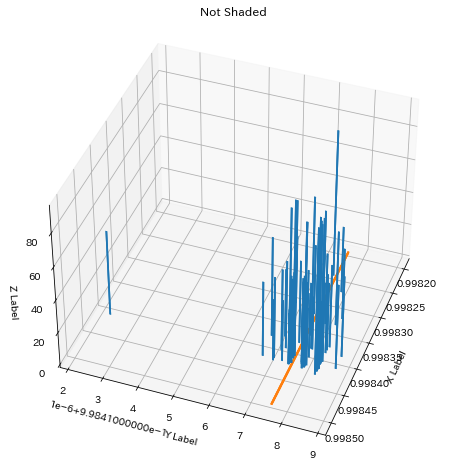

In [65]:
# set up the figure and axes
fig = plt.figure(figsize=(8, 8))
ax2 = fig.add_subplot(111, projection='3d')

x, y, z = df["H(I|M)"], df["H(I|G)"], df["偏差値"]-30
print(x, y, z)

top = z
bottom = np.zeros_like(top)
width = 0.00000005
depth = 0.00000005

ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
top2 = zz
bottom2 = np.zeros_like(top2)
ax2.bar3d(xx, yy, bottom2, width, depth, top2, shade=False)

ax2.set_title('Not Shaded')
ax2.view_init(elev=40, azim=20) #, roll=0)
ax2.set_xlabel('X Label')
ax2.set_ylabel('Y Label')
ax2.set_zlabel('Z Label')

plt.show()